Dataset: https://www.kaggle.com/datasets/andrewmvd/udemy-courses/data

In [67]:
import pandas as pd
import seaborn as sns

In [68]:
data = pd.read_csv('6 - Udemy Courses.csv', parse_dates=['published_timestamp'])
#parse_dates: to convert columns in the CSV file to datetime format

In [69]:
data.dtypes

course_id                            int64
course_title                        object
url                                 object
is_paid                               bool
price                                int64
num_subscribers                      int64
num_reviews                          int64
num_lectures                         int64
level                               object
content_duration                   float64
published_timestamp    datetime64[ns, UTC]
subject                             object
dtype: object

5. Check Null Values In The Dataset

In [70]:
data.isnull().sum()

course_id              0
course_title           0
url                    0
is_paid                0
price                  0
num_subscribers        0
num_reviews            0
num_lectures           0
level                  0
content_duration       0
published_timestamp    0
subject                0
dtype: int64

In [71]:
data.isnull().values.any()

False

<Axes: >

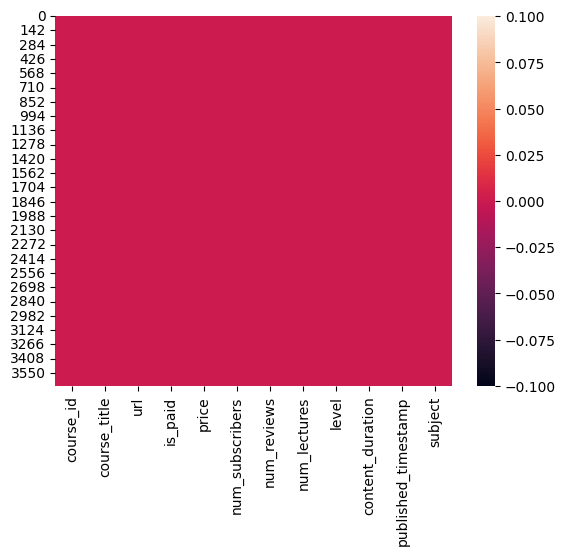

In [72]:
sns.heatmap(data.isnull())

6. Check For Duplicate Data and Drop Them

In [73]:
data.duplicated().any()

True

In [74]:
data = data.drop_duplicates()

In [75]:
data.duplicated().any()

False

7. Find Out Number of Courses Per Subjects

In [76]:
data['subject'].value_counts()

subject
Web Development        1199
Business Finance       1191
Musical Instruments     680
Graphic Design          602
Name: count, dtype: int64

In [77]:
import matplotlib.pyplot as plt

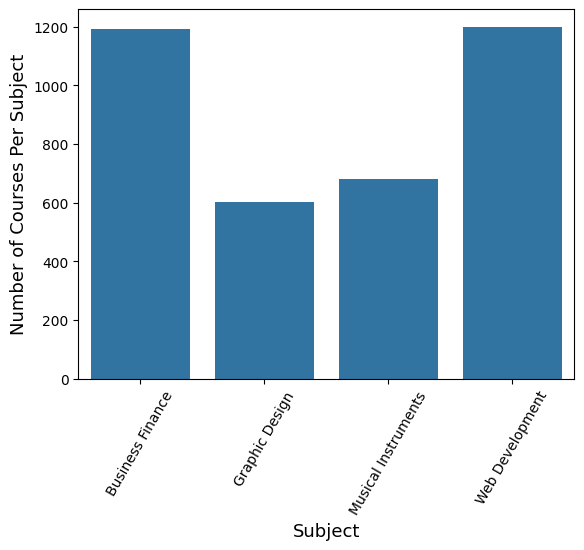

In [78]:
sns.countplot(x='subject',data=data)
plt.xlabel("Subject", fontsize=13)
plt.ylabel("Number of Courses Per Subject", fontsize=13)
plt.xticks(rotation=60)
plt.show()

8. For Which Levels, Udemy Courses Providing The Courses

In [79]:
data['level'].value_counts()

level
All Levels            1925
Beginner Level        1268
Intermediate Level     421
Expert Level            58
Name: count, dtype: int64

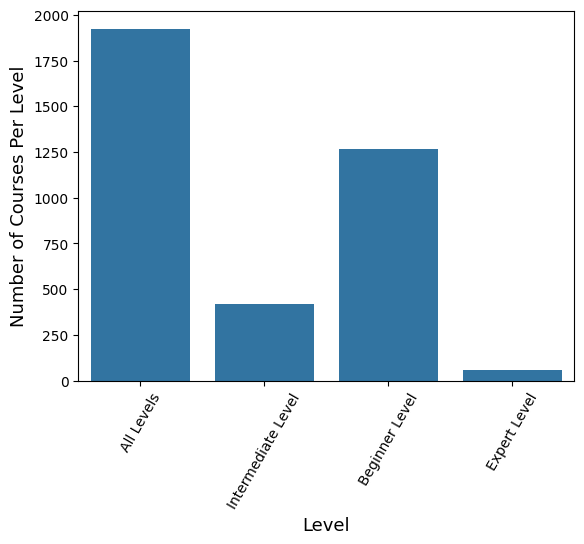

In [80]:
sns.countplot(x='level',data=data)
plt.xlabel("Level", fontsize=13)
plt.ylabel("Number of Courses Per Level", fontsize=13)
plt.xticks(rotation=60)
plt.show()

9. Display The Count of Paid and Free Courses 

In [81]:
data['is_paid'].value_counts()

is_paid
True     3362
False     310
Name: count, dtype: int64

10. Which Course Has More Lectures (Free or Paid)?

In [82]:
data.groupby('is_paid')['num_lectures'].mean()

is_paid
False    21.416129
True     41.866746
Name: num_lectures, dtype: float64

11. Which Courses Have A Higher Number of Subscribers Free or Paid?

In [83]:
data.groupby('is_paid')['num_subscribers'].mean()

is_paid
False    11533.951613
True      2421.270077
Name: num_subscribers, dtype: float64

<Axes: xlabel='is_paid', ylabel='num_subscribers'>

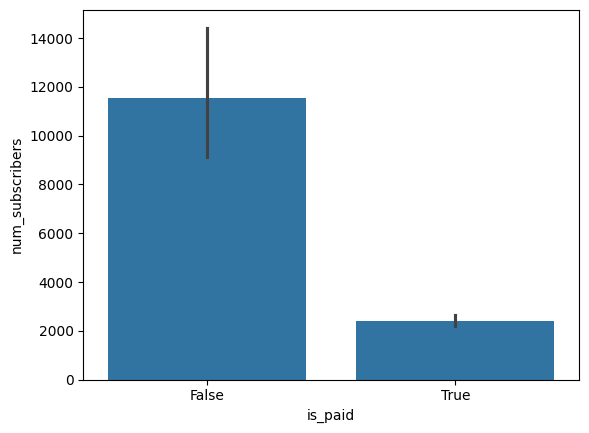

In [84]:
sns.barplot(x="is_paid", y="num_subscribers",data=data)

12. Which Level Has The Highest Number of Subscribers?

In [85]:
data.groupby('level')['num_subscribers'].mean()

level
All Levels            3569.761558
Beginner Level        3195.459779
Expert Level           865.448276
Intermediate Level    1762.482185
Name: num_subscribers, dtype: float64

([0, 1, 2, 3],
 [Text(0, 0, 'All Levels'),
  Text(1, 0, 'Intermediate Level'),
  Text(2, 0, 'Beginner Level'),
  Text(3, 0, 'Expert Level')])

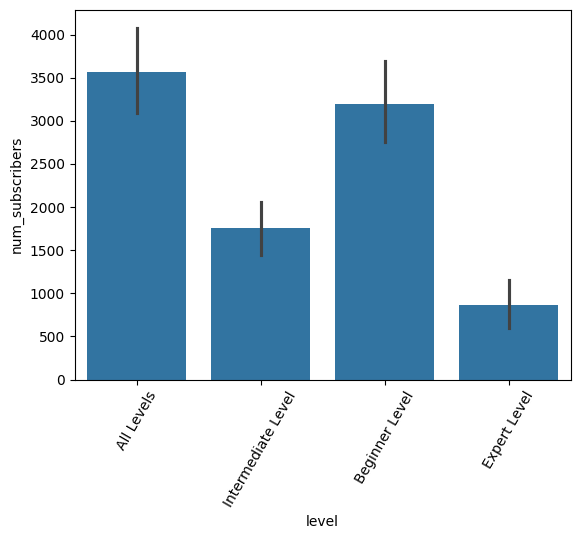

In [86]:
sns.barplot(x="level", y="num_subscribers",data=data)
plt.xticks(rotation=60)

13. Find Most Popular Course Title

In [88]:
data[data['num_subscribers']==data['num_subscribers'].max()]['course_title']

2827    Learn HTML5 Programming From Scratch
Name: course_title, dtype: object

14. Display 10 Most Popular Courses As Per Number of Subscribers

In [98]:
top_10=data.sort_values(by="num_subscribers",ascending=False).head(10)

<Axes: xlabel='num_subscribers', ylabel='course_title'>

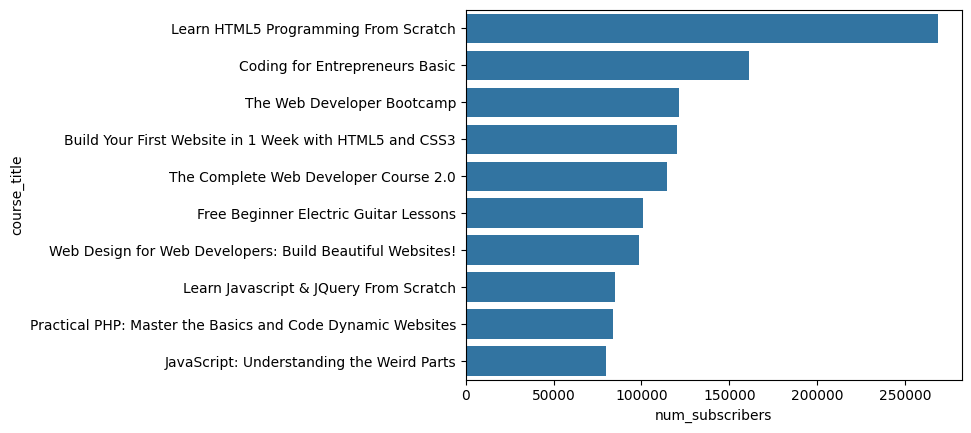

In [99]:
sns.barplot(x="num_subscribers", y="course_title", data=top_10)

15. Find The Course Which Is Having The Highest Number of Reviews.

In [101]:
data.columns

Index(['course_id', 'course_title', 'url', 'is_paid', 'price',
       'num_subscribers', 'num_reviews', 'num_lectures', 'level',
       'content_duration', 'published_timestamp', 'subject'],
      dtype='object')

In [105]:
data[data['num_reviews']==data['num_reviews'].max()]

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
3230,625204,The Web Developer Bootcamp,https://www.udemy.com/the-web-developer-bootcamp/,True,200,121584,27445,342,All Levels,43.0,2015-11-02 21:13:27+00:00,Web Development


<Axes: xlabel='subject', ylabel='num_reviews'>

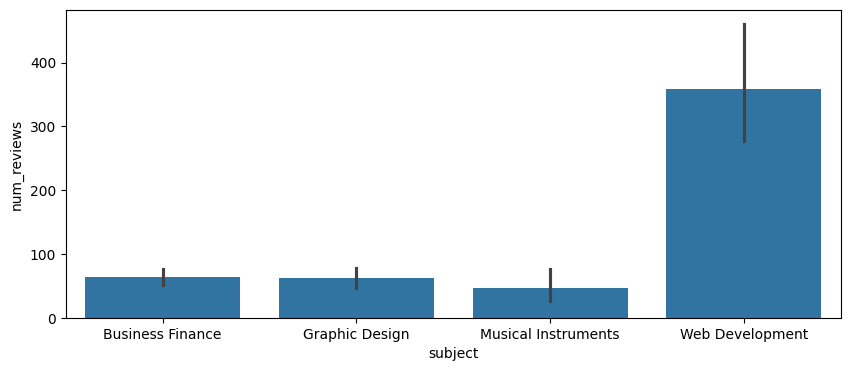

In [111]:
plt.figure(figsize=(10,4))
sns.barplot(x="subject", y="num_reviews", data=data)

16. Does Price Affect the Number of Reviews?

<Axes: xlabel='price', ylabel='num_reviews'>

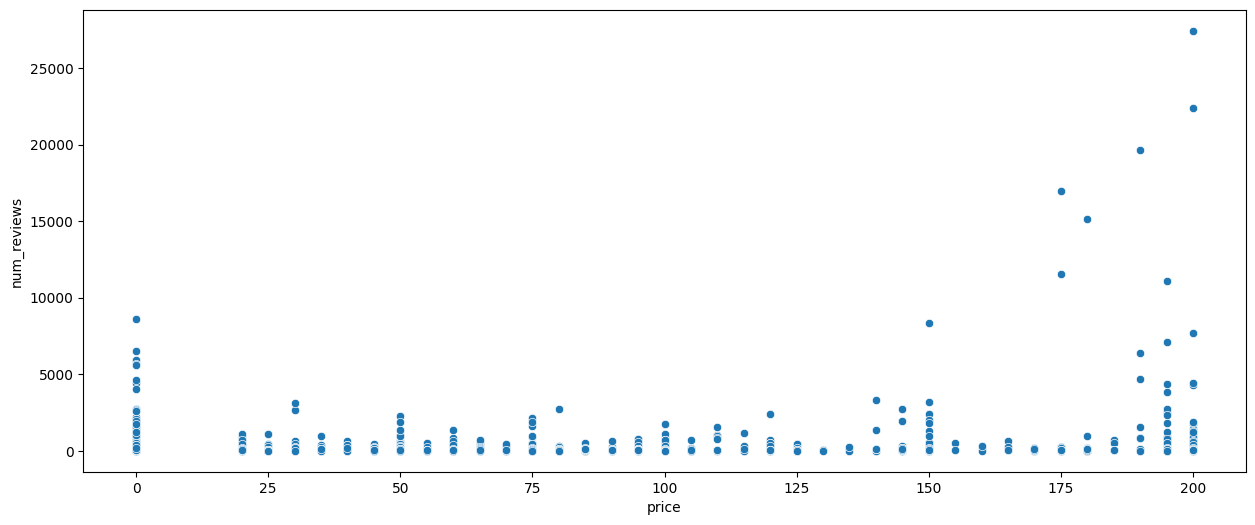

In [115]:
plt.figure(figsize=(15,6))
sns.scatterplot(x="price", y="num_reviews",data=data)

17. Find Total Number of Courses Related To Python

In [117]:
sum(data['course_title'].str.contains("python", case=False))

29

18. Display 10 Most Popular Python Courses As Per Number of Subscribers

In [120]:
data['course_title'].str.contains("python", case=False)

0       False
1       False
2       False
3       False
4       False
        ...  
3673    False
3674    False
3675    False
3676    False
3677    False
Name: course_title, Length: 3672, dtype: bool

In [124]:
data[data['course_title'].str.contains("python", case=False)].sort_values(by="num_subscribers", ascending=False).head(10)

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
2497,16646,Web Programming with Python,https://www.udemy.com/web-programming-with-pyt...,True,50,35267,217,53,All Levels,4.0,2012-04-25 00:01:43+00:00,Web Development
2570,47963,"Coding for Entrepreneurs: Learn Python, Django...",https://www.udemy.com/coding-for-entrepreneurs/,True,195,23412,799,251,All Levels,45.0,2013-04-08 00:46:14+00:00,Web Development
2528,391546,Learn Python and Django: Payment Processing,https://www.udemy.com/learn-django-code-accept...,True,70,17714,198,23,All Levels,3.5,2015-02-09 15:37:56+00:00,Web Development
3200,822444,Python and Django Full Stack Web Developer Boo...,https://www.udemy.com/python-and-django-full-s...,True,200,11832,1883,191,All Levels,31.5,2017-02-24 18:40:55+00:00,Web Development
3507,394832,Fun and creative web engineering with Python a...,https://www.udemy.com/web-engineering-with-pyt...,False,0,10917,319,25,All Levels,2.0,2015-06-09 19:51:50+00:00,Web Development
2553,938560,The Complete Ethical Hacking Course 2.0: Pytho...,https://www.udemy.com/penetration-testing-ethi...,True,195,7827,268,66,All Levels,11.0,2016-09-26 15:08:29+00:00,Web Development
3138,631128,Complete Python Web Course: Build 8 Python Web...,https://www.udemy.com/the-complete-python-web-...,True,110,7489,941,173,All Levels,16.0,2015-11-08 20:57:35+00:00,Web Development
3197,76052,Try Django 1.9 | Build a Blog and Learn Python...,https://www.udemy.com/try-django/,True,50,7407,172,147,All Levels,20.0,2014-03-04 07:12:21+00:00,Web Development
2681,477702,Python for Beginners: Python Programming Langu...,https://www.udemy.com/python-course/,True,150,6153,125,84,Beginner Level,5.0,2015-06-14 18:18:57+00:00,Web Development
3203,970600,REST APIs with Flask and Python,https://www.udemy.com/rest-api-flask-and-python/,True,110,5151,737,115,Intermediate Level,12.5,2016-11-06 19:00:38+00:00,Web Development


In [125]:
python=data[data['course_title'].str.contains("python", case=False)].sort_values(by="num_subscribers", ascending=False).head(10)

<Axes: xlabel='num_subscribers', ylabel='course_title'>

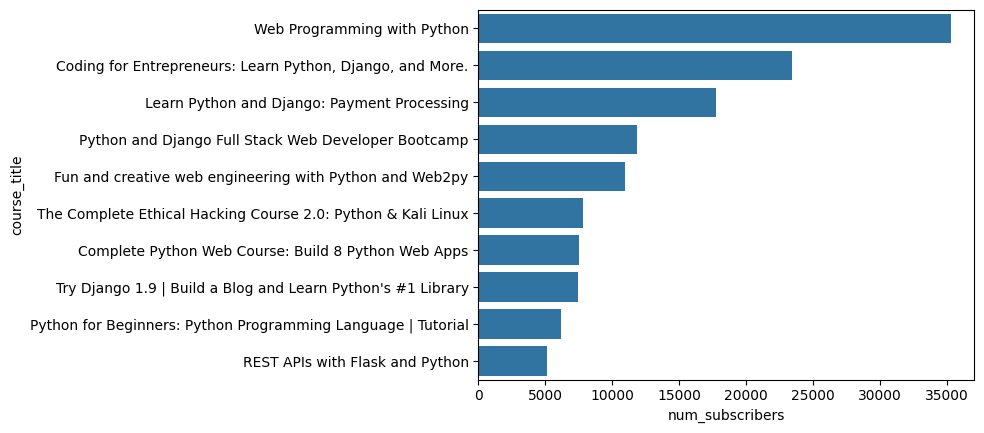

In [127]:
sns.barplot(x="num_subscribers", y="course_title", data=python)

19. In Which Year The Highest Number of Courses Were Posted?

In [130]:
data['Year'] = data['published_timestamp'].dt.year

<Axes: xlabel='Year', ylabel='count'>

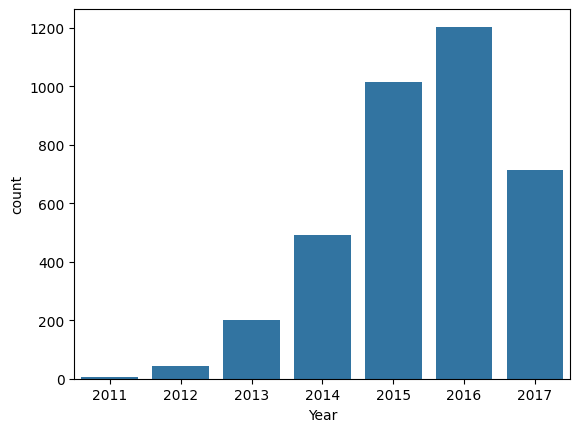

In [132]:
sns.countplot(x='Year', data=data)

20. Display Category-Wise Count of Posted Subjects [Year Wise] 

In [136]:
data.groupby('Year')['subject'].value_counts()

Year  subject            
2011  Web Development          5
2012  Web Development         19
      Graphic Design          10
      Musical Instruments     10
      Business Finance         6
2013  Business Finance        84
      Web Development         55
      Musical Instruments     39
      Graphic Design          23
2014  Business Finance       192
      Musical Instruments    120
      Web Development        113
      Graphic Design          65
2015  Business Finance       339
      Web Development        336
      Musical Instruments    171
      Graphic Design         168
2016  Web Development        448
      Business Finance       347
      Musical Instruments    228
      Graphic Design         181
2017  Business Finance       223
      Web Development        223
      Graphic Design         155
      Musical Instruments    112
Name: count, dtype: int64